In [17]:
import pandas as pd 
import string
from underthesea import word_tokenize

In [18]:
df = pd.read_json("Dataset/data_comments.json")

In [19]:
df.head()

,facebookUrl,commentUrl,id,feedbackId,date,text,profilePicture,profileId,profileName,likesCount,facebookId,postTitle,pageAdLibrary,commentsCount,attachments,profileUrl
0,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfMTE5ODkxNzI3OD...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzExOTg5MTcyNz...,2024-03-12 15:42:33+00:00,cái này hay và đẹp quá nhà Pensilia.,https://scontent.fpoa12-1.fna.fbcdn.net/v/t39....,758885537,Cuong Ta,2,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",NaN,NaN,NaN
1,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfOTM1MzgxNDQxND...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzkzNTM4MTQ0MT...,2024-03-11 07:51:06+00:00,trộm vía tóc nhanh dài và khỏe lắm Pen ơiii,https://scontent.fpoa12-1.fna.fbcdn.net/v/t1.3...,pfbid02S4hEJdBrzXCdK7skRSaX2PFzjKny4FGPxKZ4U36...,Yen Nhi Truong Tran,1,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",1.0,NaN,NaN
2,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MjE5NDYyNTY2NDA2MTZfNzExMzYyNjYxMj...,ZmVlZGJhY2s6ODIxOTQ2MjU2NjQwNjE2XzcxMTM2MjY2MT...,2024-03-22 10:35:38+00:00,NaN,https://scontent.fmem1-2.fna.fbcdn.net/v/t39.3...,pfbid02FJ7zcLDfogopoXCKHFBJzT1LT5qJep1j5v1VW65...,Cherry Nguyễn,1,821946256640616,DA KHÔ DO CƠ ĐỊA CÓ KHẮC PHỤC ĐƯỢC KHÔNG? \n\n...,"{'is_business_page_active': True, 'id': '29166...",2.0,"[{'style_list': ['sticker', 'fallback']}]",https://www.facebook.com/people/Cherry-Nguy%E1...
3,https://www.facebook.com/PhongkhamPensiliaBien...,https://www.facebook.com/PhongkhamPensiliaBien...,Y29tbWVudDo2ODY2MjE0MjY4MTIxNDNfMjc4MjI4MzkxNT...,ZmVlZGJhY2s6Njg2NjIxNDI2ODEyMTQzXzI3ODIyODM5MT...,2023-07-19 03:58:02+00:00,Pensilia chi nhánh Đồng Nai: Tầng lửng TTC Pl...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,100063928750185,Pensilia Biên Hòa,0,686621426812143,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,"{'id': '1702712593314057', 'woodhenge_creator_...",NaN,NaN,https://www.facebook.com/PhongkhamPensiliaBienHoa
4,https://www.facebook.com/PhongkhamPensiliaBien...,https://www.facebook.com/PhongkhamPensiliaBien...,Y29tbWVudDo2ODY2MjE0MjY4MTIxNDNfMzUzMDk3NDY1MD...,ZmVlZGJhY2s6Njg2NjIxNDI2ODEyMTQzXzM1MzA5NzQ2NT...,2023-07-22 16:02:39+00:00,Sang-xịn-mịn quá,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,pfbid0iBCtzqiQe6PRJqX2ZRym1MUu8ZwiTGDMeK3DEvSQ...,Đỗ Thị Mỹ Dung,1,686621426812143,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,"{'id': '1702712593314057', 'woodhenge_creator_...",NaN,NaN,https://www.facebook.com/people/%C4%90%E1%BB%9...


In [20]:
# Function for loading stopwords from a file
def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = file.readlines()
    # Remove leading and trailing whitespaces, and newline characters
    stopwords = [word.strip() for word in stopwords]
    return stopwords

# Load Vietnamese stopwords from the file
stopwords_file = "Dataset/stopwords.txt"
vietnamese_stopwords = load_stopwords(stopwords_file)

import re
def preprocess_text_vietnamese(text):
    text = str(text)
    # Lowercase
    text = text.lower()
    # Tokenization
    # Remove integers
    text = re.sub(r'\d+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation]
    # Removing stopwords
    tokens = [token for token in tokens if token not in vietnamese_stopwords]
    # Lemmatization (Vietnamese doesn't have stemming, so we skip this)
    return tokens


In [21]:
lst_text = df['text'].dropna().apply(preprocess_text_vietnamese).astype(str)

In [22]:
lst_text

0                                    ['đẹp', 'pensilia']
1      ['trộm vía', 'tóc', 'khỏe', 'lắm', 'pen', 'ơiii']
3      ['pensilia', 'chi nhánh', 'đồng nai', 'tầng', ...
4                                         ['sangxịnmịn']
5      ['đi', 'học', 'làm đẹp', 'sướng', 'nha hình', ...
                             ...                        
647           ['tuyệt vời', 'bs', 'thảo', 'thiết trình']
648                                                   []
650                                                   []
651    ['nhoe', 'mấy', 'boos', 'kem', 'thiên nhiên', ...
652                              ['bác sĩ', 'dễ thương']
Name: text, Length: 517, dtype: object

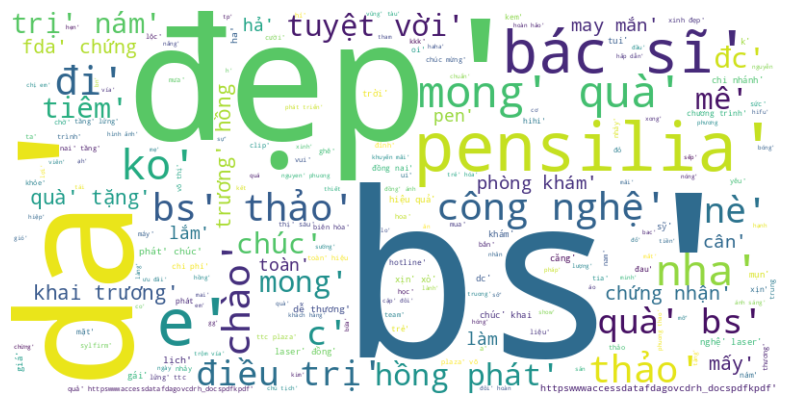

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the preprocessed text into a single string
all_text = ' '.join(lst_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
df['text'] = df['text'].dropna().apply(preprocess_text_vietnamese)

In [25]:
df.head()

,facebookUrl,commentUrl,id,feedbackId,date,text,profilePicture,profileId,profileName,likesCount,facebookId,postTitle,pageAdLibrary,commentsCount,attachments,profileUrl
0,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfMTE5ODkxNzI3OD...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzExOTg5MTcyNz...,2024-03-12 15:42:33+00:00,"[đẹp, pensilia]",https://scontent.fpoa12-1.fna.fbcdn.net/v/t39....,758885537,Cuong Ta,2,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",NaN,NaN,NaN
1,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfOTM1MzgxNDQxND...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzkzNTM4MTQ0MT...,2024-03-11 07:51:06+00:00,"[trộm vía, tóc, khỏe, lắm, pen, ơiii]",https://scontent.fpoa12-1.fna.fbcdn.net/v/t1.3...,pfbid02S4hEJdBrzXCdK7skRSaX2PFzjKny4FGPxKZ4U36...,Yen Nhi Truong Tran,1,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",1.0,NaN,NaN
2,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MjE5NDYyNTY2NDA2MTZfNzExMzYyNjYxMj...,ZmVlZGJhY2s6ODIxOTQ2MjU2NjQwNjE2XzcxMTM2MjY2MT...,2024-03-22 10:35:38+00:00,NaN,https://scontent.fmem1-2.fna.fbcdn.net/v/t39.3...,pfbid02FJ7zcLDfogopoXCKHFBJzT1LT5qJep1j5v1VW65...,Cherry Nguyễn,1,821946256640616,DA KHÔ DO CƠ ĐỊA CÓ KHẮC PHỤC ĐƯỢC KHÔNG? \n\n...,"{'is_business_page_active': True, 'id': '29166...",2.0,"[{'style_list': ['sticker', 'fallback']}]",https://www.facebook.com/people/Cherry-Nguy%E1...
3,https://www.facebook.com/PhongkhamPensiliaBien...,https://www.facebook.com/PhongkhamPensiliaBien...,Y29tbWVudDo2ODY2MjE0MjY4MTIxNDNfMjc4MjI4MzkxNT...,ZmVlZGJhY2s6Njg2NjIxNDI2ODEyMTQzXzI3ODIyODM5MT...,2023-07-19 03:58:02+00:00,"[pensilia, chi nhánh, đồng nai, tầng, lửng, tt...",https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,100063928750185,Pensilia Biên Hòa,0,686621426812143,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,"{'id': '1702712593314057', 'woodhenge_creator_...",NaN,NaN,https://www.facebook.com/PhongkhamPensiliaBienHoa
4,https://www.facebook.com/PhongkhamPensiliaBien...,https://www.facebook.com/PhongkhamPensiliaBien...,Y29tbWVudDo2ODY2MjE0MjY4MTIxNDNfMzUzMDk3NDY1MD...,ZmVlZGJhY2s6Njg2NjIxNDI2ODEyMTQzXzM1MzA5NzQ2NT...,2023-07-22 16:02:39+00:00,[sangxịnmịn],https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,pfbid0iBCtzqiQe6PRJqX2ZRym1MUu8ZwiTGDMeK3DEvSQ...,Đỗ Thị Mỹ Dung,1,686621426812143,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,"{'id': '1702712593314057', 'woodhenge_creator_...",NaN,NaN,https://www.facebook.com/people/%C4%90%E1%BB%9...


In [26]:
exploded_data = df.explode('text')

In [27]:
exploded_data.head()

,facebookUrl,commentUrl,id,feedbackId,date,text,profilePicture,profileId,profileName,likesCount,facebookId,postTitle,pageAdLibrary,commentsCount,attachments,profileUrl
0,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfMTE5ODkxNzI3OD...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzExOTg5MTcyNz...,2024-03-12 15:42:33+00:00,đẹp,https://scontent.fpoa12-1.fna.fbcdn.net/v/t39....,758885537,Cuong Ta,2,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",NaN,NaN,NaN
0,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfMTE5ODkxNzI3OD...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzExOTg5MTcyNz...,2024-03-12 15:42:33+00:00,pensilia,https://scontent.fpoa12-1.fna.fbcdn.net/v/t39....,758885537,Cuong Ta,2,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",NaN,NaN,NaN
1,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfOTM1MzgxNDQxND...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzkzNTM4MTQ0MT...,2024-03-11 07:51:06+00:00,trộm vía,https://scontent.fpoa12-1.fna.fbcdn.net/v/t1.3...,pfbid02S4hEJdBrzXCdK7skRSaX2PFzjKny4FGPxKZ4U36...,Yen Nhi Truong Tran,1,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",1.0,NaN,NaN
1,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfOTM1MzgxNDQxND...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzkzNTM4MTQ0MT...,2024-03-11 07:51:06+00:00,tóc,https://scontent.fpoa12-1.fna.fbcdn.net/v/t1.3...,pfbid02S4hEJdBrzXCdK7skRSaX2PFzjKny4FGPxKZ4U36...,Yen Nhi Truong Tran,1,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",1.0,NaN,NaN
1,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfOTM1MzgxNDQxND...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzkzNTM4MTQ0MT...,2024-03-11 07:51:06+00:00,khỏe,https://scontent.fpoa12-1.fna.fbcdn.net/v/t1.3...,pfbid02S4hEJdBrzXCdK7skRSaX2PFzjKny4FGPxKZ4U36...,Yen Nhi Truong Tran,1,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",1.0,NaN,NaN


In [31]:
exploded_data.to_csv("SMA.tsv", index=False, sep='\t')